### Concepts in Statistics

#### Creating a Dataset

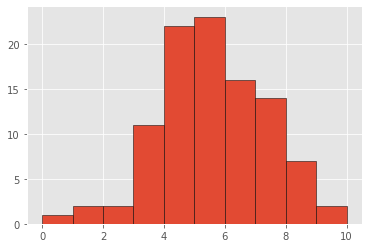

In [83]:
import numpy as np
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

np.random.seed(1)
data = np.round(np.random.normal(5, 2, 100))
plt.hist(data, bins=10, range=(0,10), edgecolor='black')
plt.show()

#### Measures of Central Tendency

Our measures of central tendency include mean, median or mode

The mean is calculated as

μ=∑Ni=1xiN The median value is the middlemost value, you take the value in the position of

n+12 of the sorted data.

The mode is the most frequent value.

#### Mean

In [84]:
mean = np.mean(data)
mean

5.1

#### Median

Numpy also implements a median function for calculating the median:

In [85]:
np.median(data)

5.0

#### Mode

We can see from our histogram already that 5 is the modal value.

There is no in-built numpy mode function, but there is one from the scipy stats module we can use.

In [86]:
mode = stats.mode(data)

print("The modal value is {} with a count of {}".format(mode.mode[0], mode.count[0]))

The modal value is 5.0 with a count of 23


#### Range

The range gives a measure of how spread apart the values are.

The range is simply calculated as the maximum value – minimum value

Max(xi) – Min(xi) Numpy implements this as a point to point function np.ptp.

In [87]:
np.ptp(data)

9.0

#### Variance

Variance is a measure of how variable the data is, it is calculated as:

σ2=∑Ni=1(xi–μ)2N Numpy implements the variance as a function np.var()

In [88]:
np.var(data)

3.07

#### Standard Deviation

The variance can get very large for large data sets and so we will often use the standard deviation, which is the square root of the variance:

σ=σ2‾‾‾√ 68.2% of the data falls within 1 standard deviation of the mean, 95.4% falls within 2 standard deviations of the mean, and 99.7% falls within 3 standard deviations.

This is implemented in Numpy as np.std()

In [89]:
np.std(data)

1.752141546793523

#### Standard Error

The standard error of the mean (SE of the mean) estimates the variability between sample means that you would obtain if you took multiple samples from the same population. The standard error of the mean estimates the variability between samples whereas the standard deviation measures the variability within a single sample.

It is calculated as:

SE=s/√n Where s is the sample standard deviation. Again Numpy doesn’t have an implementation of this (though it is easy to calculate), but we can use scipy’s stats module instead:

In [90]:
stats.sem(data)

0.1760968512214259

### Exercise
Find the mean, median, mode and std deviation for the following list

In [91]:
example = [1,22,65,95,593,860,13,54,65,96]

### Exploratory Data Analysis

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

### Loading the required libraries and packages

In [92]:
# essential libraries
import json
import random
from urllib.request import urlopen

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import folium

# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# html embedding
from IPython.display import Javascript
from IPython.core.display import display, HTML

### Loading the dataset

In [93]:
full_table = pd.read_csv('covid_19_clean_complete.csv')
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


### Cleaning the data and also filling missing values

Lets remove some of the unwanted features like Latitude, Longitude, Date, etc. & keep the important features like Confirmed, Deaths, Recovered, etc.

Also, lets combine the values for China as there are 2 names for China in the dataset. i.e. China and Mainland China

In [94]:
# cases 
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']

# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

# replacing Mainland china with just China
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

# filling missing values 
full_table[['Province/State']] = full_table[['Province/State']].fillna('')
full_table[cases] = full_table[cases].fillna(0)

### Finding the cases that occurred on ships and finding cases in China

There were a few cases which were reported on the sea, i.e. on Cruise ship 'Grand Princess' and 'Diamond Princess cruise ship'. Lets calcuate that.

Also, since COVID was first detected in China, lets group the data for China and the Rest of the world.

In [95]:
# cases in the ships
ship = full_table[full_table['Province/State'].str.contains('Grand Princess')|full_table['Province/State'].str.contains('Diamond Princess cruise ship')]

# china and the row
china = full_table[full_table['Country/Region']=='China']
row = full_table[full_table['Country/Region']!='China']

# latest
full_latest = full_table[full_table['Date'] == max(full_table['Date'])].reset_index()
china_latest = full_latest[full_latest['Country/Region']=='China']
row_latest = full_latest[full_latest['Country/Region']!='China']

# latest condensed
full_latest_grouped = full_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
china_latest_grouped = china_latest.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
row_latest_grouped = row_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

In [96]:
china_latest_grouped

,Province/State,Confirmed,Deaths,Recovered,Active
0,Anhui,991,6,985,0
1,Beijing,931,9,895,27
2,Chongqing,583,6,576,1
3,Fujian,366,1,361,4
4,Gansu,167,2,165,0
5,Guangdong,1672,8,1645,19
6,Guangxi,255,2,253,0
7,Guizhou,147,2,145,0
8,Hainan,171,6,165,0
9,Hebei,349,6,0,343


In [97]:
row_latest_grouped

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
181,West Bank and Gaza,10621,78,3752,6791
182,Western Sahara,10,1,8,1
183,Yemen,1691,483,833,375
184,Zambia,4552,140,2815,1597


### Exercise

##### Group data for United Kingdom

### World-Wide Totals

Lets look at the number of Confirmed, Recovered, Active, Deaths reported due to COVID in the world

In [98]:
temp = full_table.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].max()

In [99]:
temp

,,Confirmed,Deaths,Recovered,Active
Country/Region,Province/State,,,,
Afghanistan,,36263,1269,25198,20311
Albania,,4880,144,2745,1991
Algeria,,27973,1163,18837,8114
Andorra,,907,52,803,504
Angola,,950,41,242,667
...,...,...,...,...,...
West Bank and Gaza,,10621,78,3752,7382
Western Sahara,,10,1,8,6
Yemen,,1691,483,833,580


In [100]:
temp = full_table.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp = temp[temp['Date']==max(temp['Date'])].reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1')

,Date,Confirmed,Deaths,Recovered,Active
0,2020-07-27,16480485,654036,9468087,6358362


### Progression of virus over time

It would make sense to see how the virus has spread over time across different countries.

I have used https://app.flourish.studio/ to create a bar-chart-race to show the progression of virus over time

In [101]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/3677391"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

### Cumulative Outcomes

Now, since we have seen and analyzed how the virus spread across the world over time, we should also analyze how many cases were active, recovered, and deaths over time.

In [102]:
temp = full_table.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Active'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case',
             title='Cases over time', color_discrete_sequence = [rec, dth, act])
fig.update_layout(margin=dict(t=80,l=0,r=0,b=0))
fig 

### Recovery and Mortality Rate

In [103]:
temp = full_table.groupby('Date').sum().reset_index()

# adding two more columns
temp['No. of Deaths to 100 Confirmed Cases'] = round(temp['Deaths']/temp['Confirmed'], 3)*100
temp['No. of Recovered to 100 Confirmed Cases'] = round(temp['Recovered']/temp['Confirmed'], 3)*100
# temp['No. of Recovered to 1 Death Case'] = round(temp['Recovered']/temp['Deaths'], 3)

temp = temp.melt(id_vars='Date', value_vars=['No. of Deaths to 100 Confirmed Cases', 'No. of Recovered to 100 Confirmed Cases'], 
                 var_name='Ratio', value_name='Value')

fig = px.line(temp, x="Date", y="Value", color='Ratio', log_y=True, 
              title='Recovery and Mortality Rate Over The Time',
              color_discrete_sequence=[dth, rec])
fig.update_layout(legend=dict(orientation="h", y=1, x=0, 
                              xanchor="left", yanchor="top"),
                  margin=dict(t=80,l=0,r=0,b=0))
fig

### No. of Places to which COVID-19 spread

In [104]:
c_spread = china[china['Confirmed']!=0].groupby('Date')['Province/State'].unique().apply(len)
c_spread = pd.DataFrame(c_spread).reset_index()

fig = px.line(c_spread, x='Date', y='Province/State', text='Province/State',
              title='Number of Provinces/States/Regions of China<br>to which COVID-19 spread over the time',
             color_discrete_sequence=[cnf,dth, rec])
fig.update_traces(textposition='top center')
fig.update_layout(margin=dict(t=80,l=0,r=0,b=0))
fig

In [105]:
spread = full_table[full_table['Confirmed']!=0].groupby('Date')['Country/Region'].unique().apply(len)
spread = pd.DataFrame(spread).reset_index()

fig = px.line(spread, x='Date', y='Country/Region', text='Country/Region',
              title='Number of Countries/Regions<br>to which COVID-19 spread over the time',
             color_discrete_sequence=[cnf,dth, rec])
fig.update_traces(textposition='top center')
fig.update_layout(margin=dict(t=80,l=0,r=0,b=0))
fig

### Maps

Lets plot these on a Map

In [106]:
# Confirmed

fig = px.choropleth(full_latest_grouped, locations="Country/Region", 
                    locationmode='country names', color="Confirmed", 
                    hover_name="Country/Region", range_color=[1,7000], 
                    color_continuous_scale="aggrnyl", 
                    title='Countries with Confirmed Cases')
fig.update(layout_coloraxis_showscale=False)
fig.update_layout(margin=dict(t=80,l=0,r=0,b=0))
fig

In [107]:
# Deaths

fig = px.choropleth(full_latest_grouped[full_latest_grouped['Deaths']>0], 
                    locations="Country/Region", locationmode='country names',
                    color="Deaths", hover_name="Country/Region", 
                    range_color=[1,50], color_continuous_scale="agsunset",
                    title='Countries with Deaths Reported')
fig.update(layout_coloraxis_showscale=False)
fig.update_layout(margin=dict(t=80,l=0,r=0,b=0))
fig

### Top 20 countries

Lets get the Top 20 affected countries based on Total number of Active, Confirmed, Recoveries and Deaths

Also, lets calculate the Total number of deaths per 100 confirmed cases, and the countries with the worst death ratio

In [108]:
flg = full_latest_grouped
flg.head()

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667


In [109]:
# Confirmed

fig = px.bar(flg.sort_values('Confirmed', ascending=False).head(20).sort_values('Confirmed', ascending=True), 
             x="Confirmed", y="Country/Region", title='Confirmed Cases', text='Confirmed', orientation='h', 
             width=700, height=700, range_x = [0, max(flg['Confirmed'])+10000])
fig.update_traces(marker_color=cnf, opacity=0.6, textposition='outside')
fig.update_layout(margin=dict(t=80,l=0,r=0,b=0))
fig

In [110]:
# Deaths

fig = px.bar(flg.sort_values('Deaths', ascending=False).head(20).sort_values('Deaths', ascending=True), 
             x="Deaths", y="Country/Region", title='Deaths', text='Deaths', orientation='h', 
             width=700, height=700, range_x = [0, max(flg['Deaths'])+500])
fig.update_traces(marker_color=dth, opacity=0.6, textposition='outside')
fig.update_layout(margin=dict(t=80,l=0,r=0,b=0))
fig

### Exercise

##### Find the recovered cases by countries

In [111]:
#Active

fig = px.bar(flg.sort_values('Active', ascending=False).head(20).sort_values('Active', ascending=True), 
             x="Active", y="Country/Region", title='Active', text='Active', orientation='h', 
             width=700, height=700, range_x = [0, max(flg['Active'])+3000])
fig.update_traces(marker_color=act, opacity=0.6, textposition='outside')
fig.update_layout(margin=dict(t=80,l=0,r=0,b=0))
fig

##### Calculating Number of Deaths per 100 confirmed cases

In [112]:
# (Only countries with more than 100 case are considered)

flg['Mortality Rate'] = round((flg['Deaths']/flg['Confirmed'])*100, 2)
temp = flg[flg['Confirmed']>100]
temp = temp.sort_values('Mortality Rate', ascending=False)

fig = px.bar(temp.sort_values('Mortality Rate', ascending=False).head(15).sort_values('Mortality Rate', ascending=True), 
             x="Mortality Rate", y="Country/Region", text='Mortality Rate', orientation='h', 
             width=700, height=600, range_x = [0, 35], title='No. of Deaths Per 100 Confirmed Case')
fig.update_traces(marker_color=act, opacity=0.6, textposition='outside')
fig.update_layout(margin=dict(t=80,l=0,r=0,b=0))
fig

##### Plotting the same details on a Heatmap

In [113]:
fig = px.treemap(full_latest.sort_values(by='Confirmed', ascending=False).reset_index(drop=True), 
                 path=["Country/Region", "Province/State"], values="Confirmed", height=700,
                 title='Number of Confirmed Cases',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.data[0].textinfo = 'label+text+value'
fig.update_layout(margin=dict(t=80,l=0,r=0,b=0))
fig

### Exercise

##### Generate number of deaths on a heatmap

### China vs Not China

In [114]:
# In China
temp = china.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().diff()
temp = temp.reset_index()
temp = temp.melt(id_vars="Date", 
                 value_vars=['Confirmed', 'Deaths', 'Recovered'])

fig = px.bar(temp, x="Date", y="value", color='variable', 
             title='In China',
             color_discrete_sequence=[cnf, dth, rec])
fig.update_layout(barmode='group')
fig.update_layout(margin=dict(t=80,l=0,r=0,b=0))
fig

In [115]:
# ROW
temp = row.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().diff()
temp = temp.reset_index()
temp = temp.melt(id_vars="Date", 
                 value_vars=['Confirmed', 'Deaths', 'Recovered'])

fig = px.bar(temp, x="Date", y="value", color='variable', 
             title='Outside China',
             color_discrete_sequence=[cnf, dth, rec])
fig.update_layout(barmode='group')
fig.update_layout(margin=dict(t=80,l=0,r=0,b=0))
fig

In [116]:
gdf = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
gdf = gdf.reset_index()

temp = gdf[gdf['Country/Region']=='China'].reset_index()
temp = temp.melt(id_vars='Date', value_vars=['Confirmed', 'Deaths', 'Recovered'],
                var_name='Case', value_name='Count')
fig = px.bar(temp, x="Date", y="Count", color='Case', facet_col="Case",
            title='China', color_discrete_sequence=[cnf, dth, rec])
fig.update_layout(margin=dict(t=80,l=0,r=0,b=0))
fig

In [117]:
temp = gdf[gdf['Country/Region']!='China'].groupby('Date').sum().reset_index()
temp = temp.melt(id_vars='Date', value_vars=['Confirmed', 'Deaths', 'Recovered'],
                var_name='Case', value_name='Count')
fig = px.bar(temp, x="Date", y="Count", color='Case', facet_col="Case",
             title='ROW', color_discrete_sequence=[cnf, dth, rec])
fig.update_layout(margin=dict(t=80,l=0,r=0,b=0))
fig

### Data by Country

Re-analyzing the data in tabular format to understand the mortality rate in the worst affected countries

### Top 50 countries by Confirmed Cases

In [118]:
temp_f = full_latest_grouped.sort_values(by='Confirmed', ascending=False).head(50)
temp_f = temp_f.reset_index(drop=True)
temp_f.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered,Active,Mortality Rate
0,US,4290259,148011,1325804,2816444,3.450000
1,Brazil,2442375,87618,1846641,508116,3.590000
2,India,1480073,33408,951166,495499,2.260000
3,Russia,816680,13334,602249,201097,1.630000
4,South Africa,452529,7067,274925,170537,1.560000
5,Mexico,395489,44022,303810,47657,11.130000
6,Peru,389717,18418,272547,98752,4.730000
7,Chile,347923,9187,319954,18782,2.640000
8,United Kingdom,301708,45844,1437,254427,15.190000
9,Iran,293606,15912,255144,22550,5.420000


### Top 25 Countries By Deaths Reported

In [119]:
temp_flg = temp_f[temp_f['Deaths']>0][['Country/Region', 'Deaths']].head(25)
temp_flg.sort_values('Deaths', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

,Country/Region,Deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


### Top 25 Chinese Provinces By Confirmed Cases

In [120]:
temp_f = china_latest_grouped[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
temp_f = temp_f.sort_values(by='Confirmed', ascending=False)
temp_f = temp_f.reset_index(drop=True)
temp_f.style.background_gradient(cmap='Pastel1_r')

,Province/State,Confirmed,Deaths,Recovered
0,Hubei,68135,4512,63623
1,Hong Kong,2778,22,1486
2,Guangdong,1672,8,1645
3,Henan,1276,22,0
4,Zhejiang,1270,1,1268
5,Hunan,1019,4,1015
6,Anhui,991,6,985
7,Heilongjiang,947,13,934
8,Jiangxi,932,1,931
9,Beijing,931,9,895


### References

Data - 
https://github.com/CSSEGISandData/COVID-19